<a href="https://colab.research.google.com/github/ozcannrabia/projects/blob/main/movierental_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
df = pd.read_csv("rental_info.csv")

In [ ]:
df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


,0
rental_date,0
return_date,0
amount,0
release_year,0
rental_rate,0
length,0
replacement_cost,0
special_features,0
NC-17,0
PG,0


In [ ]:
df["rental_date"] = pd.to_datetime(df["rental_date"])
df["return_date"] = pd.to_datetime(df["return_date"])
df["rental_duration"] = (df["return_date"] - df["rental_date"]).dt.days
df.drop(["rental_date", "return_date"], axis=1, inplace=True)

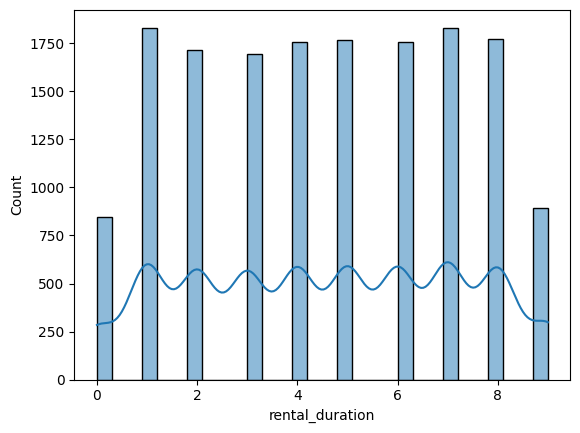

In [ ]:
df.describe()
sns.histplot(df["rental_duration"], bins=30, kde=True)
plt.show()


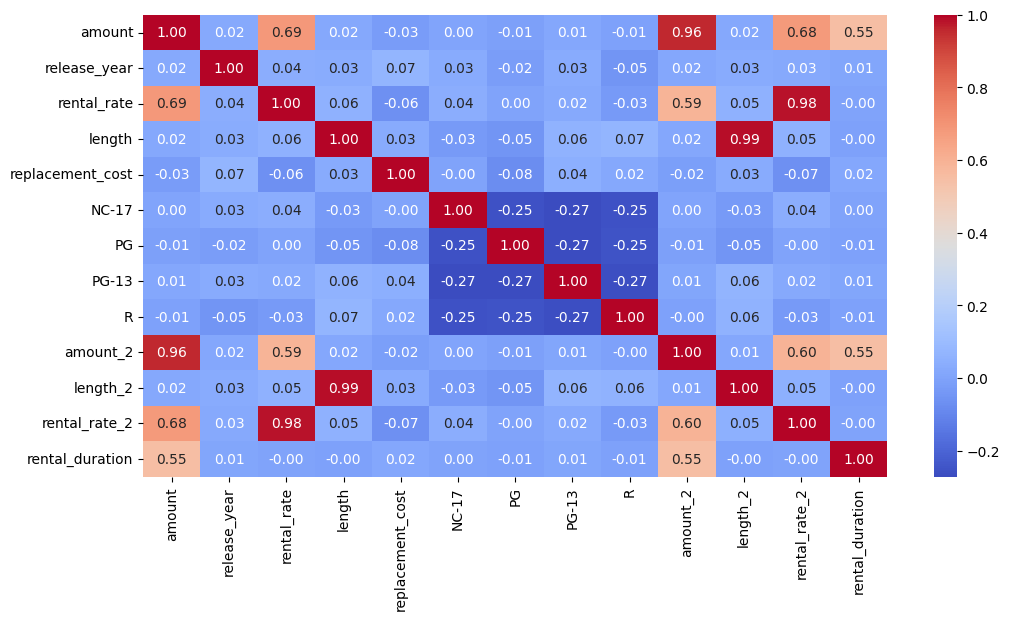

In [ ]:
#Korelasyon matrisi: Korelasyon matrisini sadece sayısal değişkenler için hesaplarız.
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [ ]:
X = df.drop("rental_duration", axis=1).select_dtypes(include=[np.number])  # Sadece sayısal değişkenleri alacağız
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
#vıf testi

             Feature         VIF
0             amount   71.862931
1       release_year  104.489977
2        rental_rate  139.907287
3             length  378.863023
4   replacement_cost   12.212287
5              NC-17    2.195328
6                 PG    2.173316
7              PG-13    2.307946
8                  R    2.171650
9           amount_2   27.976684
10          length_2  143.439389
11     rental_rate_2   71.847536


In [ ]:
print(df.columns)


Index(['amount', 'release_year', 'rental_rate', 'length', 'replacement_cost',
       'special_features', 'NC-17', 'PG', 'PG-13', 'R', 'amount_2', 'length_2',
       'rental_rate_2', 'rental_duration'],
      dtype='object')


Yeni Özellik Eklenmesi:

In [ ]:
df['amount_per_day'] = df['amount'] / df['rental_duration']  # Günlük ödeme miktarı
df['length_per_day'] = df['length'] / df['rental_duration']  # Kiralanan gün başına film uzunluğu
df['cost_per_day'] = df['replacement_cost'] / df['rental_duration']  # Değiştirme maliyeti / kiralama süresi


In [ ]:
df = pd.get_dummies(df, columns=['special_features', 'NC-17', 'PG', 'PG-13', 'R'], drop_first=True)


In [ ]:
numeric_columns = ['amount', 'rental_rate', 'release_year', 'length', 'replacement_cost']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['rental_duration'])
y = df['rental_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

# Sonsuz veya çok büyük değerlerin olup olmadığını kontrol et
print(np.isinf(df).sum())  # Bu, her sütundaki sonsuz değerlerin sayısını gösterecek.


amount                                                                             0
release_year                                                                       0
rental_rate                                                                        0
length                                                                             0
replacement_cost                                                                   0
amount_2                                                                           0
length_2                                                                           0
rental_rate_2                                                                      0
rental_duration                                                                    0
amount_per_day                                                                   846
length_per_day                                                                   846
cost_per_day                                                     

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Sonsuzları NaN ile değiştir


In [ ]:
df.fillna(df.mean(), inplace=True)  # Eksik değerleri ortalama ile doldur


In [ ]:
# Sayısal sütunları tekrar ölçeklendir
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('rental_duration', axis=1), df['rental_duration'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")


Linear Regression MSE: 1.5526


In [ ]:
#Ridge ve Lasso Regresyon
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))

print(f"Ridge Regression MSE: {ridge_mse:.4f}")
print(f"Lasso Regression MSE: {lasso_mse:.4f}")


Ridge Regression MSE: 1.5525
Lasso Regression MSE: 1.8317


In [ ]:
#Random Forest ve Gradient Boosting:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf.predict(X_test))

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_mse = mean_squared_error(y_test, gb.predict(X_test))

print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Gradient Boosting MSE: {gb_mse:.4f}")


Random Forest MSE: 0.0003
Gradient Boosting MSE: 0.0383


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_mse = mean_squared_error(y_test, best_model.predict(X_test))

print(f"Optimized Random Forest MSE: {best_mse:.4f}")


Optimized Random Forest MSE: 0.0003


In [ ]:
import joblib
joblib.dump(best_model, 'rental_duration_model.pkl')


['rental_duration_model.pkl']

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hiperparametreler
param_grid = {
    'alpha': [0.1, 1, 10, 100]  # Regularization parametresi
}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'alpha': 1}


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE:", -cv_scores.mean())


Cross-validation MSE: 1.615707377666468


In [ ]:
# Modelin önemli özelliklerini göster
coef_df = pd.DataFrame(best_model.coef_, X_train.columns, columns=['Coefficient'])
print(coef_df)


                                                    Coefficient
amount                                                 3.068296
release_year                                           0.017785
rental_rate                                           -1.375169
length                                                 0.258942
replacement_cost                                       0.121680
amount_2                                              -0.038783
length_2                                              -0.000010
rental_rate_2                                          0.012858
amount_per_day                                        -0.663813
length_per_day                                        -0.010643
cost_per_day                                          -0.070691
special_features_{"Deleted Scenes","Behind the ...    -0.025910
special_features_{"Deleted Scenes"}                   -0.119204
special_features_{Commentaries,"Behind the Scen...    -0.032775
special_features_{Commentaries,"Deleted 

<ipython-input-51-713ab1d61092>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df['Coefficient'], y=coef_df.index, palette='viridis')


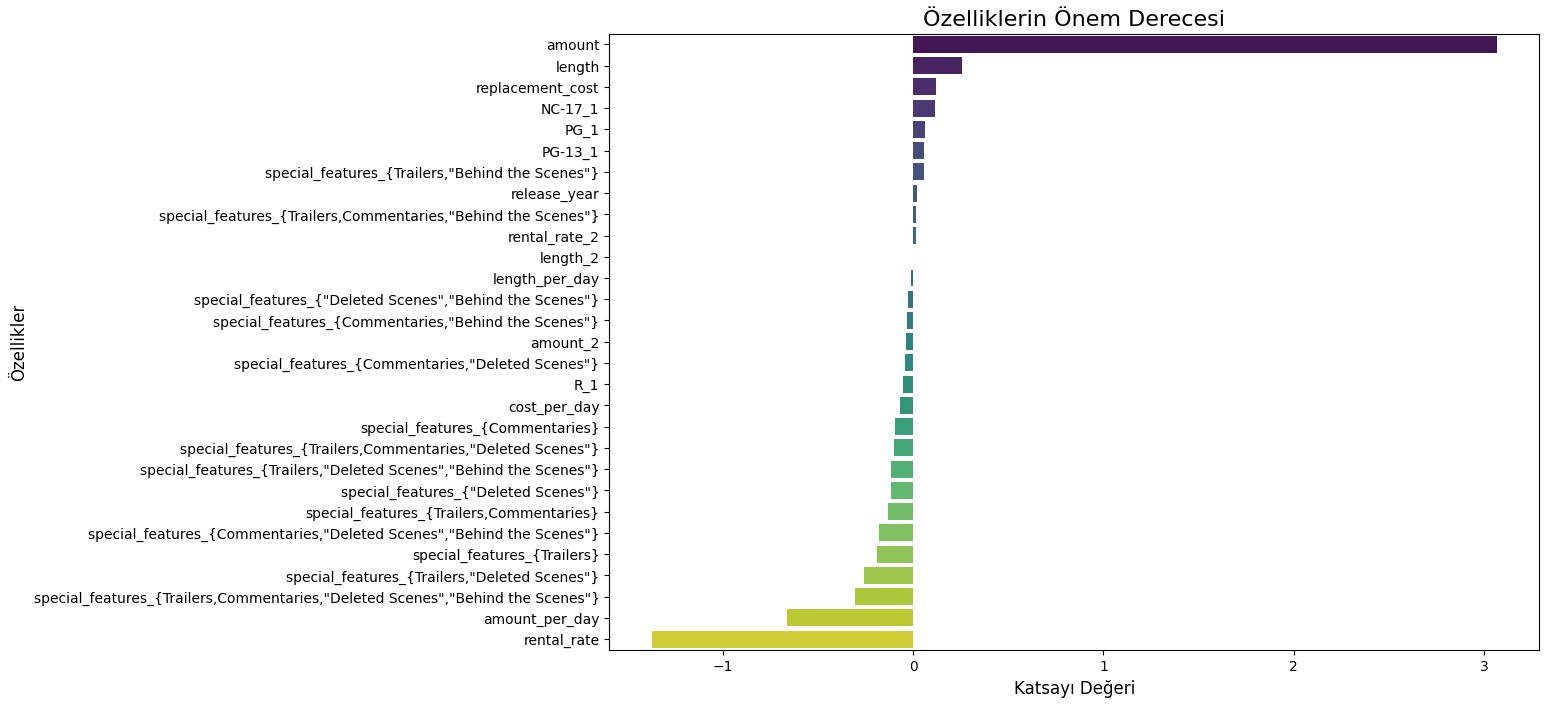

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Katsayıları sıralayıp daha temiz hale getirelim
coef_df = pd.DataFrame(best_model.coef_, X_train.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Grafik boyutlarını ayarlayalım
plt.figure(figsize=(12, 8))

# Barplot ile görselleştirelim
sns.barplot(x=coef_df['Coefficient'], y=coef_df.index, palette='viridis')

# Başlık ve etiketler
plt.title('Özelliklerin Önem Derecesi', fontsize=16)
plt.xlabel('Katsayı Değeri', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Daha okunabilir hale getirmek için etiketleri gösterelim
plt.show()


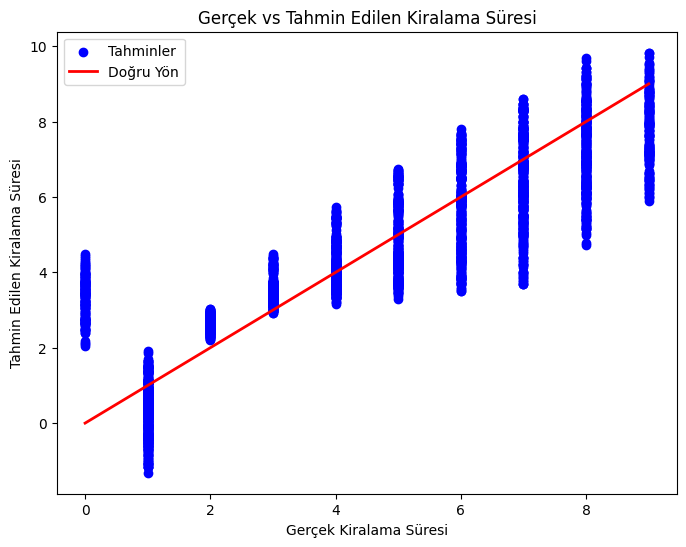

In [ ]:
# Gerçek ve tahmin edilen değerleri çizme
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Doğru Yön')
plt.title('Gerçek vs Tahmin Edilen Kiralama Süresi')
plt.xlabel('Gerçek Kiralama Süresi')
plt.ylabel('Tahmin Edilen Kiralama Süresi')
plt.legend()
plt.show()


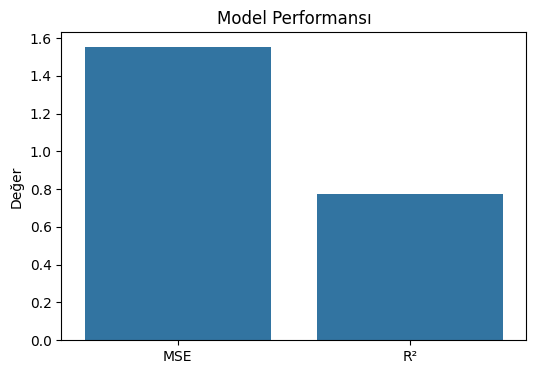

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Metrikleri görselleştirme
metrics = {'MSE': mse, 'R²': r2}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Model Performansı')
plt.ylabel('Değer')
plt.show()


In [ ]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.9 MB/s eta 0:00:00


<ipython-input-70-46131b972e80>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df['Coefficient'], y=coef_df.index, palette='viridis')


Rapor basariyla olusturuldu! PDF yol: /content/model_report.pdf


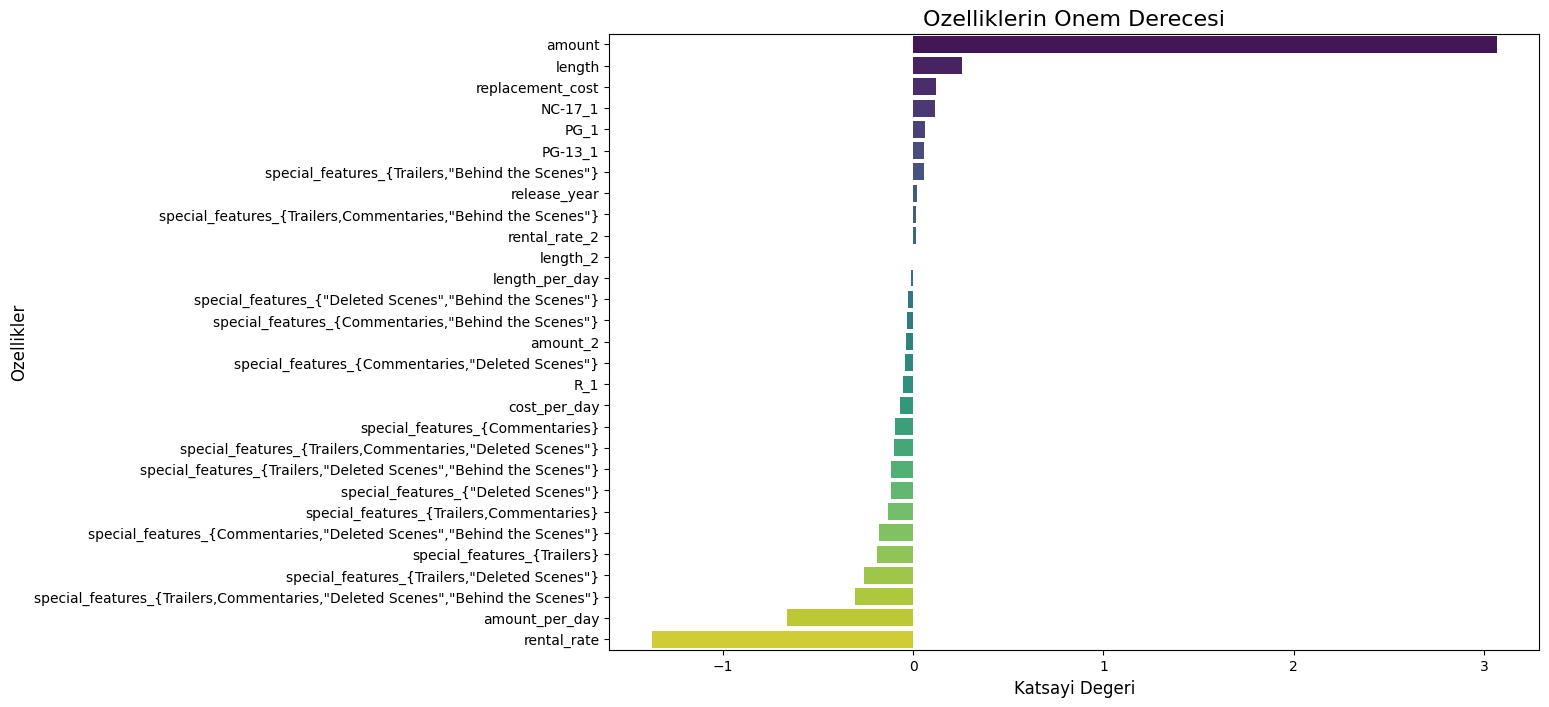

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# PDF dosyasını oluştur
pdf_path = "/content/model_report.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)

# Başlık ekleyelim
c.setFont("Helvetica-Bold", 16)
c.drawString(100, 770, "Model Sonuclari ve Oneriler")

# Boşluk bırakma işlevi
def draw_text(text, x, y, max_width=500):
    lines = text.split('\n')
    for line in lines:
        c.drawString(x, y, line)
        y -= 14  # Bir sonraki satıra geçerken mesafe bırakıyoruz.
    return y

# Birinci metin bölümü - Başlangıç
c.setFont("Helvetica", 12)
text_1 = """
1. Veri Kesfi ve On Isleme:
- Veri seti yuklendi ve eksiklikler temizlendi.
- Kiralama suresi 'rental_duration' olarak hesaplandi.
"""
y_position = 730
y_position = draw_text(text_1, 100, y_position)

# İkinci metin bölümü
text_2 = """
2. Ozellik Secimi ve Korelasyon Analizi:
- Degiskenler arasinda guclu korelasyonlar tespit edildi.
- Multicollinearity testi ile baglantili degiskenler belirlendi.
"""
y_position = draw_text(text_2, 100, y_position)

# Üçüncü metin bölümü
text_3 = """
3. Model Egitimi:
- Basit dogrusal regresyon modeli ve daha kompleks modeller (Lasso, Ridge, Random Forest vb.) kullanildi.
"""
y_position = draw_text(text_3, 100, y_position)

# Dördüncü metin bölümü
text_4 = """
4. Model Performansi:
- MSE ve R² degerleri kullanilarak modeller degerlendirildi.
- En dusuk MSE degerine sahip model secildi.
"""
y_position = draw_text(text_4, 100, y_position)

# Beşinci metin bölümü
text_5 = """
5. Model Sonuclari:
- En onemli ozellikler ve bunlarin tahminlere etkisi aciklandi.
"""
y_position = draw_text(text_5, 100, y_position)

# Grafik: Ozelliklerin onem derecesi
coef_df = pd.DataFrame(best_model.coef_, X_train.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Grafik boyutlarını ayarlayalım
plt.figure(figsize=(12, 8))

# Barplot ile görselleştirelim
sns.barplot(x=coef_df['Coefficient'], y=coef_df.index, palette='viridis')

# Başlık ve etiketler
plt.title('Ozelliklerin Onem Derecesi', fontsize=16)
plt.xlabel('Katsayi Degeri', fontsize=12)
plt.ylabel('Ozellikler', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Grafik kaydedelim
plt.savefig("/content/feature_importance.png")

# Grafik görselini PDF'ye ekleyelim
c.drawImage("/content/feature_importance.png", 100, y_position-100, width=400, height=250)

# PDF'yi kaydedelim
c.save()

print(f"Rapor basariyla olusturuldu! PDF yol: {pdf_path}")


In [ ]:
from google.colab import files

# PDF dosyasını indir
files.download("/content/model_report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>